                                        Artificial Intelligence And Data Science

                                                   Machine Learning

                                                     Course Work

                                                         2024

    Name: Gouri Napevithanage

    Student ID(IIT) : 20210808

    Student ID(RGU) :2237943

Imports



In [1467]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# ***DATASET PEPARATION***

    Load Dataset

In [1468]:
columns = ['age','workclass','fnlwgt','education','education-num','marital-status', 'occupation', 'relationship','race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
#Load adult.data
ad = pd.read_csv('adult.data', names=columns, na_values=' ?')
#Load adult.test
adt = pd.read_csv('adult.test', names=columns, na_values=' ?', skiprows=1)
#Remove periods and dots from income column
adt.loc[:,'income']=adt['income'].str.replace('.','',regex=True)
#Combine Datasets
combined_dataframe= pd.concat([ad, adt], ignore_index=True)
combined_dataframe.reset_index(drop=True,inplace=True)
#Display
combined_dataframe

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


    Display Information

In [1469]:
#Display the dimensions of the dataframe
print(f'Number of rows and columns in the dataframe:{combined_dataframe.shape}')

Number of rows and columns in the dataframe:(48842, 15)


    Summary of the Dataframe

In [1470]:
#Display the summary of information about the dataframe
summary_cdf = pd.DataFrame({'Total count': combined_dataframe.shape[0],'Non-Null Count': combined_dataframe.count(),'Data type': combined_dataframe.dtypes})
summary_cdf


,Total count,Non-Null Count,Data type
age,48842,48842,int64
workclass,48842,46043,object
fnlwgt,48842,48842,int64
education,48842,48842,object
education-num,48842,48842,int64
marital-status,48842,48842,object
occupation,48842,46033,object
relationship,48842,48842,object
race,48842,48842,object
sex,48842,48842,object


In [1471]:
#Display the count of each unique value in 'income' column
income_count =combined_dataframe['income'].value_counts()
income_count

 <=50K    37155
 >50K     11687
Name: income, dtype: int64

    Display the total number of records per category with empty values.

In [1472]:
#Count the total number of values in the 'occupation' column
num_occupation =combined_dataframe['occupation'].value_counts().sum()
# Print the total number of values in the 'occupation' column
print(f'Number of values in the occupation:{num_occupation}')
#Display the count of each unique value in the 'occupation' column
combined_dataframe['occupation'].value_counts()

Number of values in the occupation:46033


 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

In [1473]:
#Display the count of each unique value in 'native-country' column
num_native_country =combined_dataframe['native-country'].value_counts().sum()
print(f'Number of values in the native country:{num_native_country}')
#Display the count of each unique value in the 'native-country' column
combined_dataframe['native-country'].value_counts()

Number of values in the native country:47985


 United-States                 43832
 Mexico                          951
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 Peru                             46
 

In [1474]:
#Display the count of each unique value in 'workclass' column
num_workclass =combined_dataframe['workclass'].value_counts().sum()
print(f'Number of values in the workclass:{num_workclass}')
#Display the count of each unique value in the 'workclass' column
combined_dataframe['workclass'].value_counts()

Number of values in the workclass:46043


 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

    Data Cleaning

In [1475]:
#Drop the 'education' and 'fnlwgt' columns from the dataframe
combined_dataframe = combined_dataframe.drop(['education', 'fnlwgt'], axis = 1)
#Display the updated dataframe
combined_dataframe.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


    Duplication Handling

In [1476]:
#Calculate and print the number of duplicated rows in the dataframe
print("Number of duplicated values: ", combined_dataframe.duplicated().sum())
# Remove the duplicated rows from the dataframe
clean_data = combined_dataframe.drop_duplicates()
#Calculate and print the number of duplicated rows in the cleaned dataframe
print("Number of duplicated values after data cleaning: ", clean_data.duplicated().sum())

Number of duplicated values:  6374
Number of duplicated values after data cleaning:  0


In [1477]:
#Display the updated dataframe
clean_data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
48837,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,NaN,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48840,44,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


    Handling Missing values

In [1478]:
#Check for missing data in the entire dataframe
null_cd = clean_data.isnull().sum()
null_cd

age                  0
workclass         2411
education-num        0
marital-status       0
occupation        2421
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     853
income               0
dtype: int64

    Data dropping

In [1479]:
#Remove rows with missing values from the dataframe
cleaned_data = clean_data.dropna()
#Print the total number of rows in the original dataframe
print(f'Number of rows: {combined_dataframe.shape[0]}')
#Print the total number of rows after handling duplicates
print(f'Number of rows after duplication handling: {clean_data.shape[0]}')
#Print the total number of remaining rows after removing rows with missing values
print(f'Number of remaining rows: {cleaned_data.shape[0]} ')

Number of rows: 48842
Number of rows after duplication handling: 42468
Number of remaining rows: 39240 


In [1480]:
#Check for missing data in the entire dataframe
null_cdf = cleaned_data.isnull().sum()
null_cdf

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [1481]:
#Reset index
cleaned_data.reset_index(drop=True, inplace=True)
#Display the updated dataframe
cleaned_data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39235,48,Local-gov,14,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K
39236,33,Private,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
39237,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
39238,44,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


    Summary of the Cleaned dataframe

In [1482]:
#Display summary of the entire dataframe
summary_cd = pd.DataFrame({'Total count': cleaned_data.shape[0],'Non-Null Count': cleaned_data.count(),'Data type': cleaned_data.dtypes})
summary_cd

,Total count,Non-Null Count,Data type
age,39240,39240,int64
workclass,39240,39240,object
education-num,39240,39240,int64
marital-status,39240,39240,object
occupation,39240,39240,object
relationship,39240,39240,object
race,39240,39240,object
sex,39240,39240,object
capital-gain,39240,39240,int64
capital-loss,39240,39240,int64


# ***HANDLE OUTLIERS***

In [1483]:
#Print the total number of rows in the cleaned dataframe
print(f'\nThe length of the data is: {len(cleaned_data)}')


The length of the data is: 39240


In [1484]:
#Define a function to detect and remove outliers in a given feature of a dataframe
def outliers(feature,dataframe):
  #Calculate Quartiles
  q1 = dataframe[feature].quantile(0.25)
  q3 = dataframe[feature].quantile(0.75)
  #Calculate the IQR
  IQR = q3 - q1
  #Define the bounds
  lower_bound = q1 - (1.5 * IQR)
  upper_bound = q3 + (1.5 * IQR)
  #Remove outliers
  #Only keep rows where the feature value is within the lower and upper bounds
  dataframe = dataframe[(dataframe[feature] >= lower_bound) & (dataframe[feature] < upper_bound)]

  print(f'\nfeature: {feature}')
  print(f'lower bound: {lower_bound}')
  print(f'upper bound: {upper_bound}')
  return dataframe #return the dataframe without outliers


In [1485]:
#Call the outliers function for the specified feature
cleaned_data = outliers('age',cleaned_data)
cleaned_data = outliers('hours-per-week',cleaned_data)


feature: age
lower bound: 0.5
upper bound: 76.5

feature: hours-per-week
lower bound: 32.5
upper bound: 52.5


In [1486]:
#Print the length of the dataframe after handling outliers
print(f'\nThe length of the final DataFrame is: {len(cleaned_data)}')


The length of the final DataFrame is: 28140


# ***DATA SCALING***

In [1487]:
#Initialize the StandardScaler
data_scaler = StandardScaler()
#Fit & Transform the numeric columns
scaled_features = data_scaler.fit_transform(cleaned_data.select_dtypes(include =['int64','float64']))
#New dataframe with scaled features
scaled_dataframe =pd.DataFrame(scaled_features,columns=cleaned_data.select_dtypes(include=['int64','float64']).columns)
#Concatenate the scaled data
final_dataframe = pd.concat([scaled_dataframe,cleaned_data.select_dtypes(exclude=['int64','float64']).reset_index(drop=True)],axis=1)


In [1488]:
#Display the updated dataframe
print('Dataframe after Standard Scaling: ')
final_dataframe

Dataframe after Standard Scaling: 


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass,marital-status,occupation,relationship,race,sex,native-country,income
0,-0.035718,1.090814,0.140481,-0.239647,-0.411831,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,-0.118977,-0.440249,-0.159721,-0.239647,-0.411831,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,1.129907,-1.205780,-0.159721,-0.239647,-0.411831,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,-0.951566,1.090814,-0.159721,-0.239647,-0.411831,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,-0.202236,1.473580,-0.159721,-0.239647,-0.411831,Private,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28135,1.795979,-0.440249,-0.159721,-0.239647,1.501440,Private,Married-civ-spouse,Sales,Husband,White,Male,United-States,<=50K
28136,0.713613,1.473580,-0.159721,-0.239647,-0.411831,Local-gov,Divorced,Other-service,Not-in-family,White,Male,United-States,<=50K
28137,-0.535272,1.090814,-0.159721,-0.239647,-0.411831,Private,Never-married,Prof-specialty,Own-child,White,Male,United-States,<=50K
28138,-0.035718,1.090814,-0.159721,-0.239647,-1.368466,Private,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K


# ***MEAN AND STANDARD DEVIATION CALCULATION***

---



    Mean Calculation

In [1489]:
# Select numerical columns
columns = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
#Mean calculation before data cleaning
mean_cdf = combined_dataframe[columns].mean()
#Mean calculation before scaling
mean_cd = cleaned_data[columns].mean()
#Mean calculation after scaling
mean_fdf = final_dataframe[columns].mean()
#Display
print('Mean calculation before data cleaning: ')
print(mean_cdf)
print('\nMean calculation before scaling: ')
print(mean_cd)
print('\nMean calculation before after scaling: ')
print(mean_fdf)

Mean calculation before data cleaning: 
age                 38.643585
education-num       10.078089
capital-gain      1079.067626
capital-loss        87.502314
hours-per-week      40.422382
dtype: float64

Mean calculation before scaling: 
age                 39.428998
education-num       10.150178
capital-gain      1156.666347
capital-loss       104.561052
hours-per-week      41.721997
dtype: float64

Mean calculation before after scaling: 
age               1.020111e-16
education-num    -2.550278e-16
capital-gain      1.010011e-18
capital-loss      5.201557e-17
hours-per-week    2.431601e-16
dtype: float64


    Standard Deviation calculation

In [1490]:
#Standard Deviation calculation before data cleaning
std_cdf = combined_dataframe[columns].std()
#Standard Deviation calculation  before scaling
std_cd = cleaned_data[columns].std()
#Standard Deviation calculation after scaling
std_fdf = final_dataframe[columns].std()
#Display
print('Standard Deviation calculation  before data cleaning: ')
print(std_cdf)
print('\nStandard Deviation calculation before scaling: ')
print(std_cd)
print('\nStandard Deviation calculation before after scaling: ')
print(std_fdf)

Standard Deviation calculation  before data cleaning: 
age                 13.710510
education-num        2.570973
capital-gain      7452.019058
capital-loss       403.004552
hours-per-week      12.391444
dtype: float64

Standard Deviation calculation before scaling: 
age                 12.010936
education-num        2.612611
capital-gain      7241.937019
capital-loss       436.320051
hours-per-week       4.181395
dtype: float64

Standard Deviation calculation before after scaling: 
age               1.000018
education-num     1.000018
capital-gain      1.000018
capital-loss      1.000018
hours-per-week    1.000018
dtype: float64


# ***DATA VISUALIZATION***

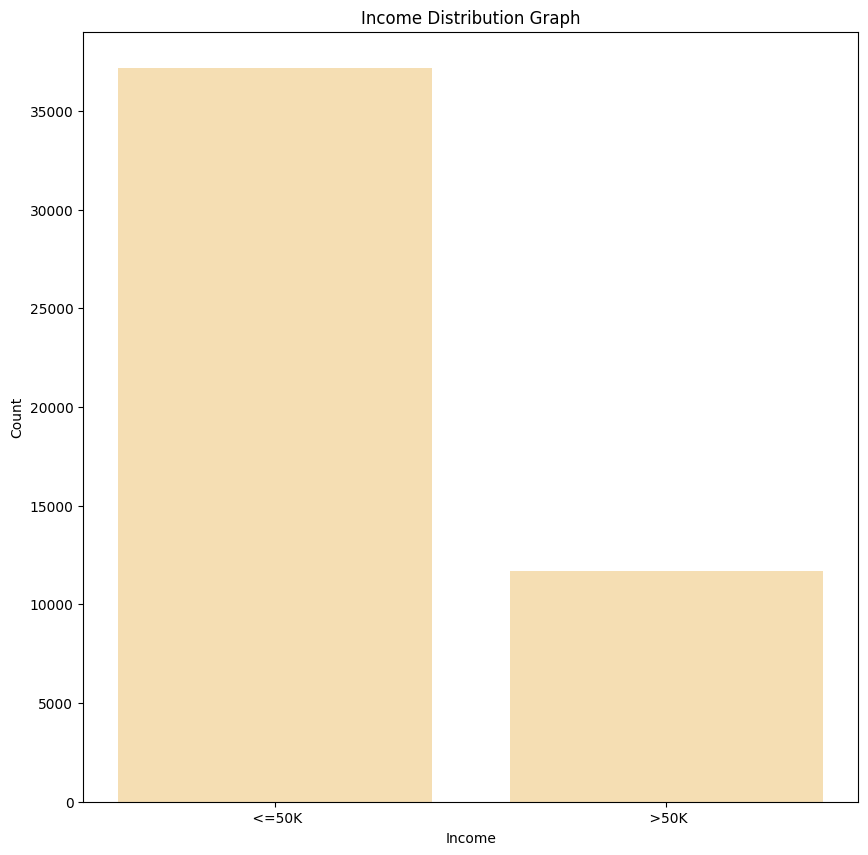

In [1491]:
# Plot income class distribution
plt.figure(figsize=(10,10))
#Create a bar plot with 'income_count.index' as x and 'income_count.values' as y
plt.bar(income_count.index, income_count.values, color ='wheat')
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution Graph')
plt.show()

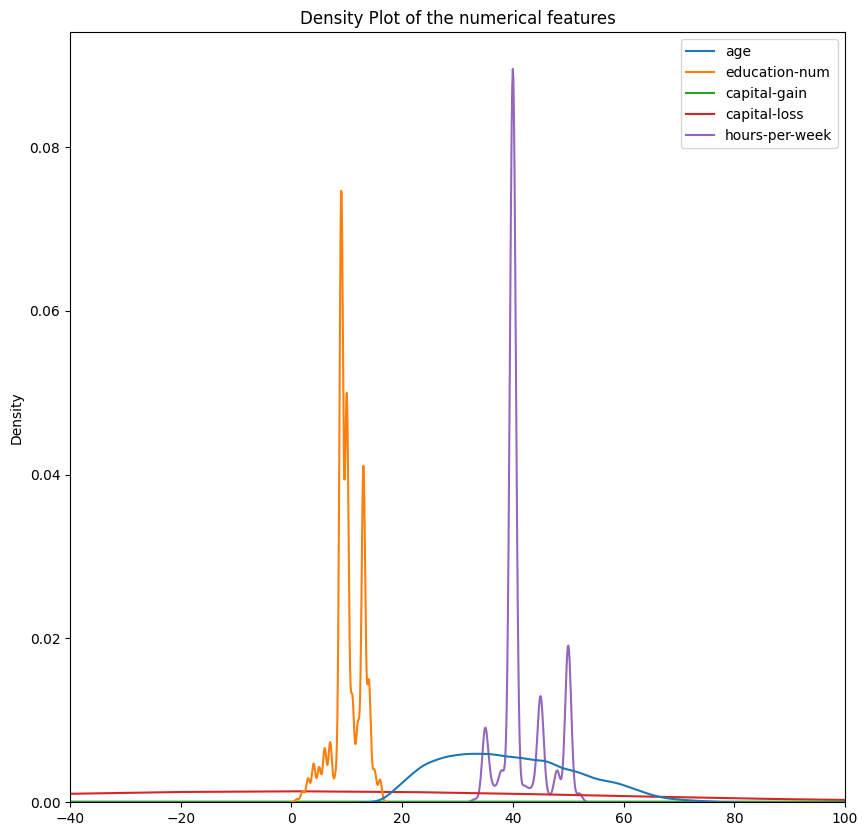

In [1492]:
#Create a new figure with specified size
fig,ax =plt.subplots(figsize=(10,10))
#Generate a Kernel Density Estimate (KDE) plot for the cleaned data
sns.kdeplot(data=cleaned_data,ax=ax)
ax.set_xlim(-40,100) #Set the x-axis limits
plt.title('Density Plot of the numerical features')
plt.show()

    Box Plots

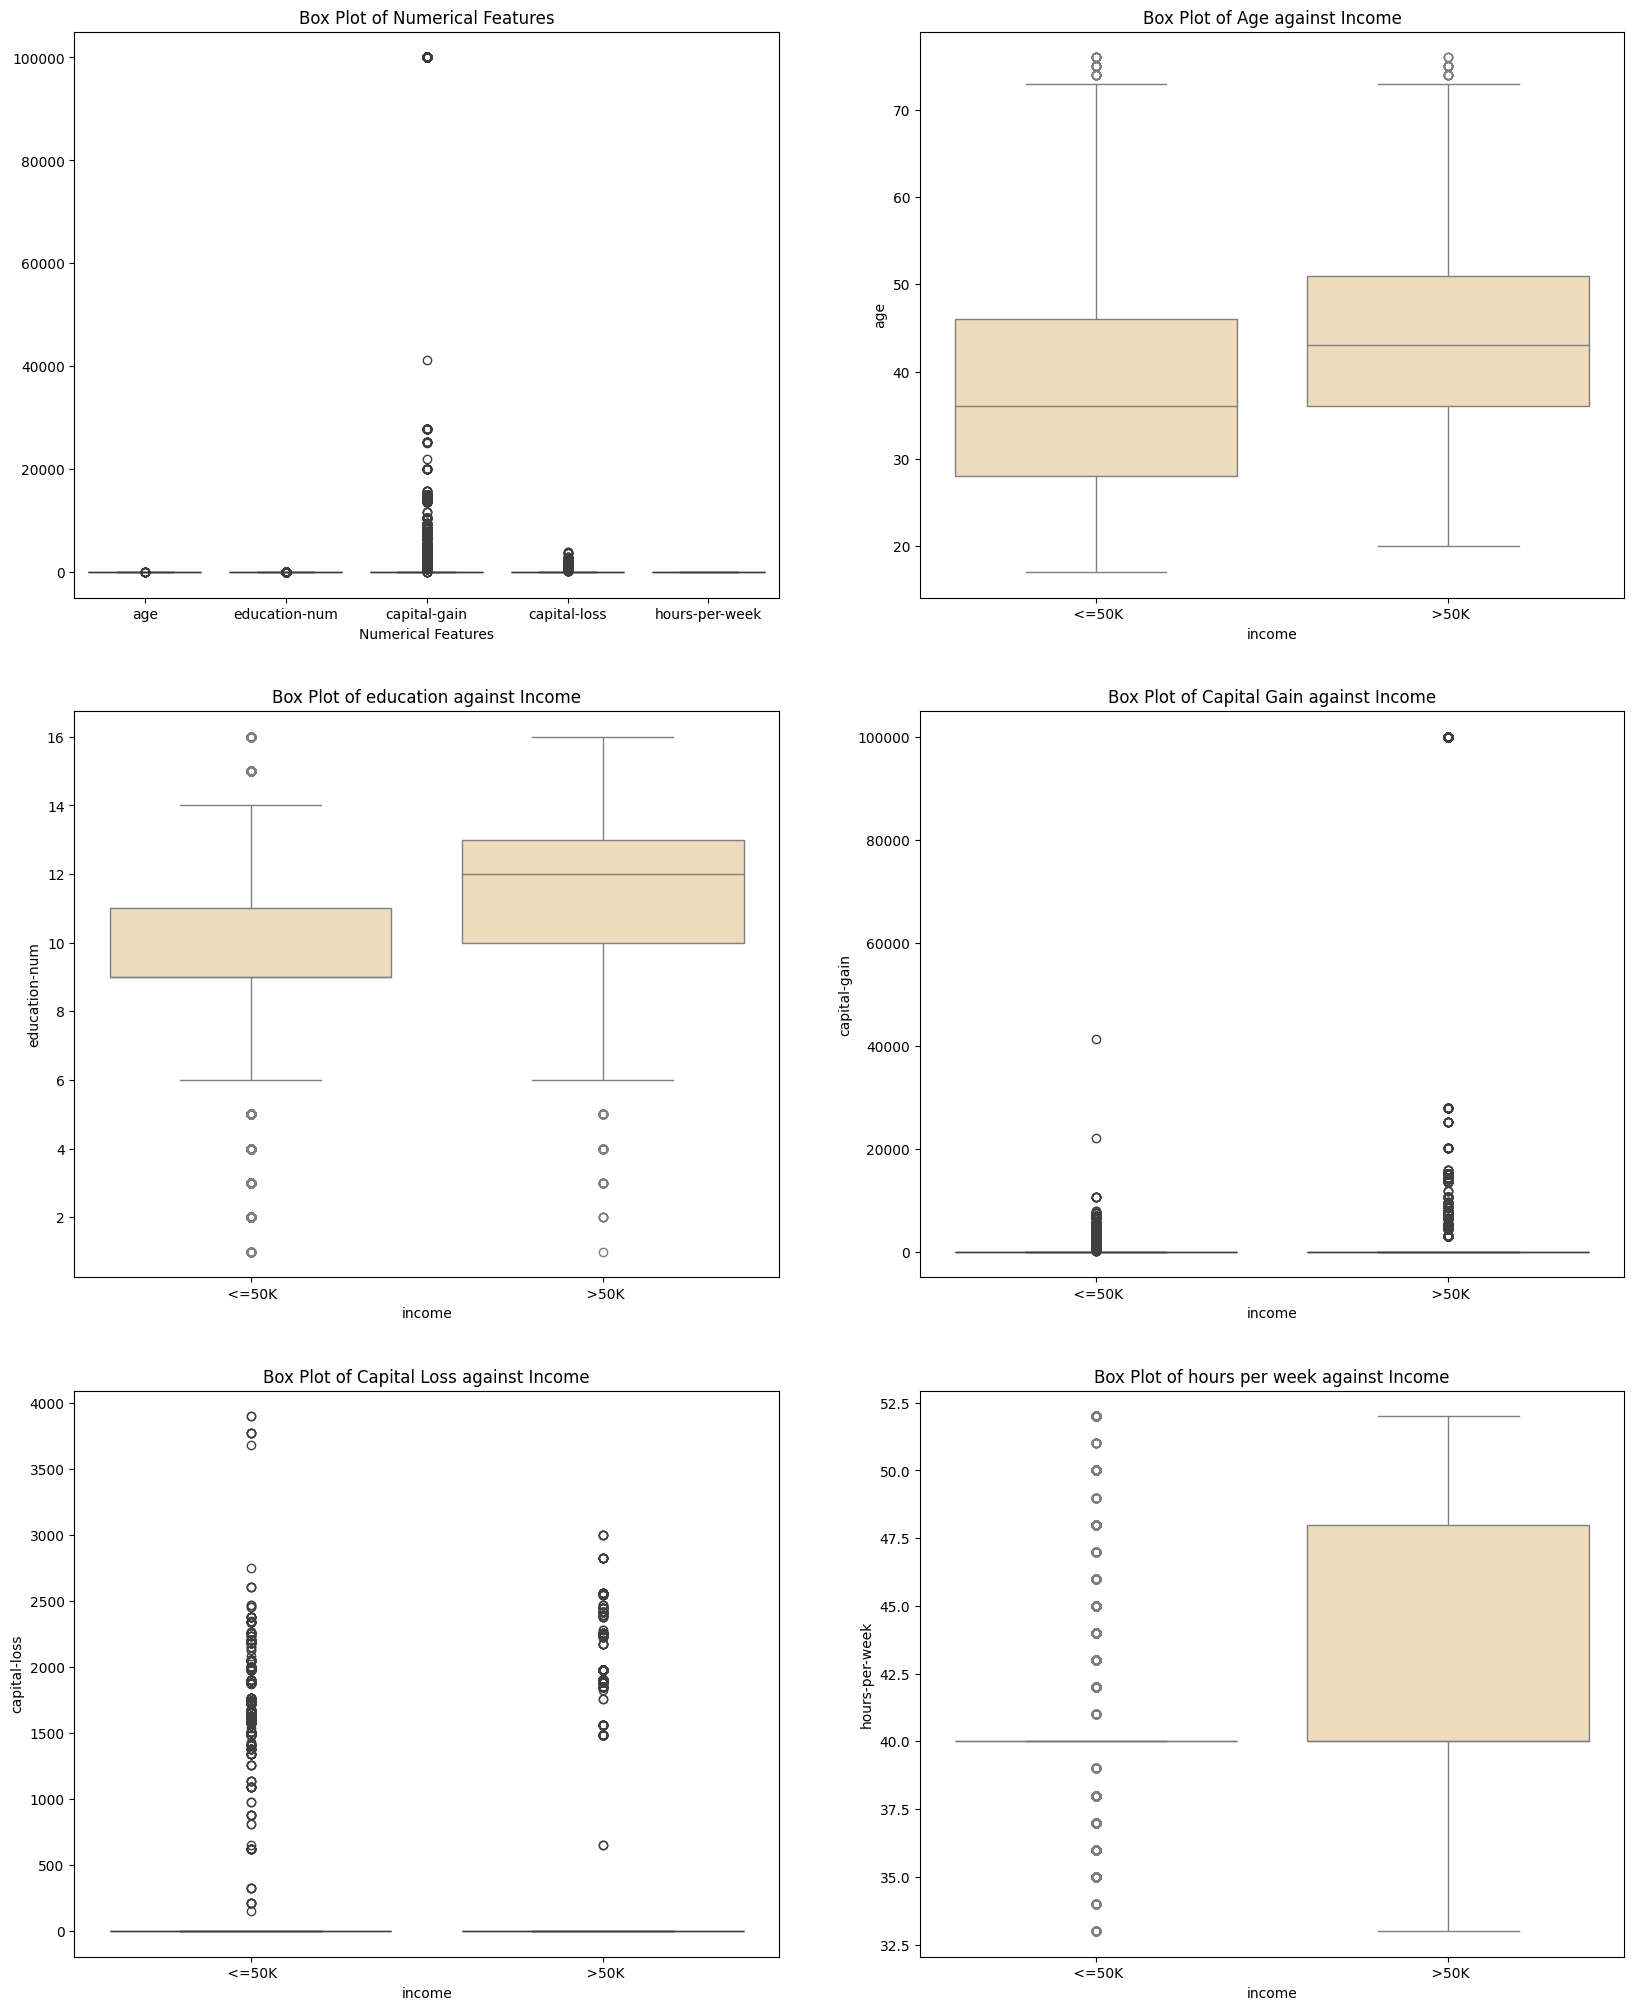

In [1493]:
#Define the income categories to filter the dataset
income_categories = [' <=50K', ' >50K']
#Filter the dataset based on the defined income categories
filtered_data = cleaned_data[cleaned_data['income'].isin(income_categories)]

# Create a subplot
fig,ax =plt.subplots(nrows=3,ncols=2,figsize=(20, 25))

# Create a box plot of all numerical features in the cleaned data
sns.boxplot(ax=ax[0,0], data=cleaned_data,color ='wheat')
ax[0,0].set_title('Box Plot of Numerical Features')
ax[0,0].set_xlabel('Numerical Features')

#Create a box plot of 'age' / 'income'
sns.boxplot(x='income', y='age',ax=ax[0,1], data=filtered_data,color ='wheat')
ax[0,1].set_title('Box Plot of Age against Income')

#Create a box plot of 'education-num' against 'income'
sns.boxplot(x='income', y='education-num',ax=ax[1,0], data=filtered_data,color ='wheat')
ax[1,0].set_title('Box Plot of education against Income')

#Create a box plot of 'capital-gain' against 'income'
sns.boxplot(x='income', y='capital-gain',ax=ax[1,1], data=filtered_data)
ax[1,1].set_title('Box Plot of Capital Gain against Income')

#Create a box plot of 'capital-loss' against 'income'
sns.boxplot(x='income', y='capital-loss',ax=ax[2,0], data=filtered_data)
ax[2,0].set_title('Box Plot of Capital Loss against Income')

#Create a box plot of 'hours-per-week' against 'income'
sns.boxplot(x='income', y='hours-per-week',ax=ax[2,1], data=filtered_data,color ='wheat')
ax[2,1].set_title('Box Plot of hours per week against Income')

plt.show()

        Bar plots

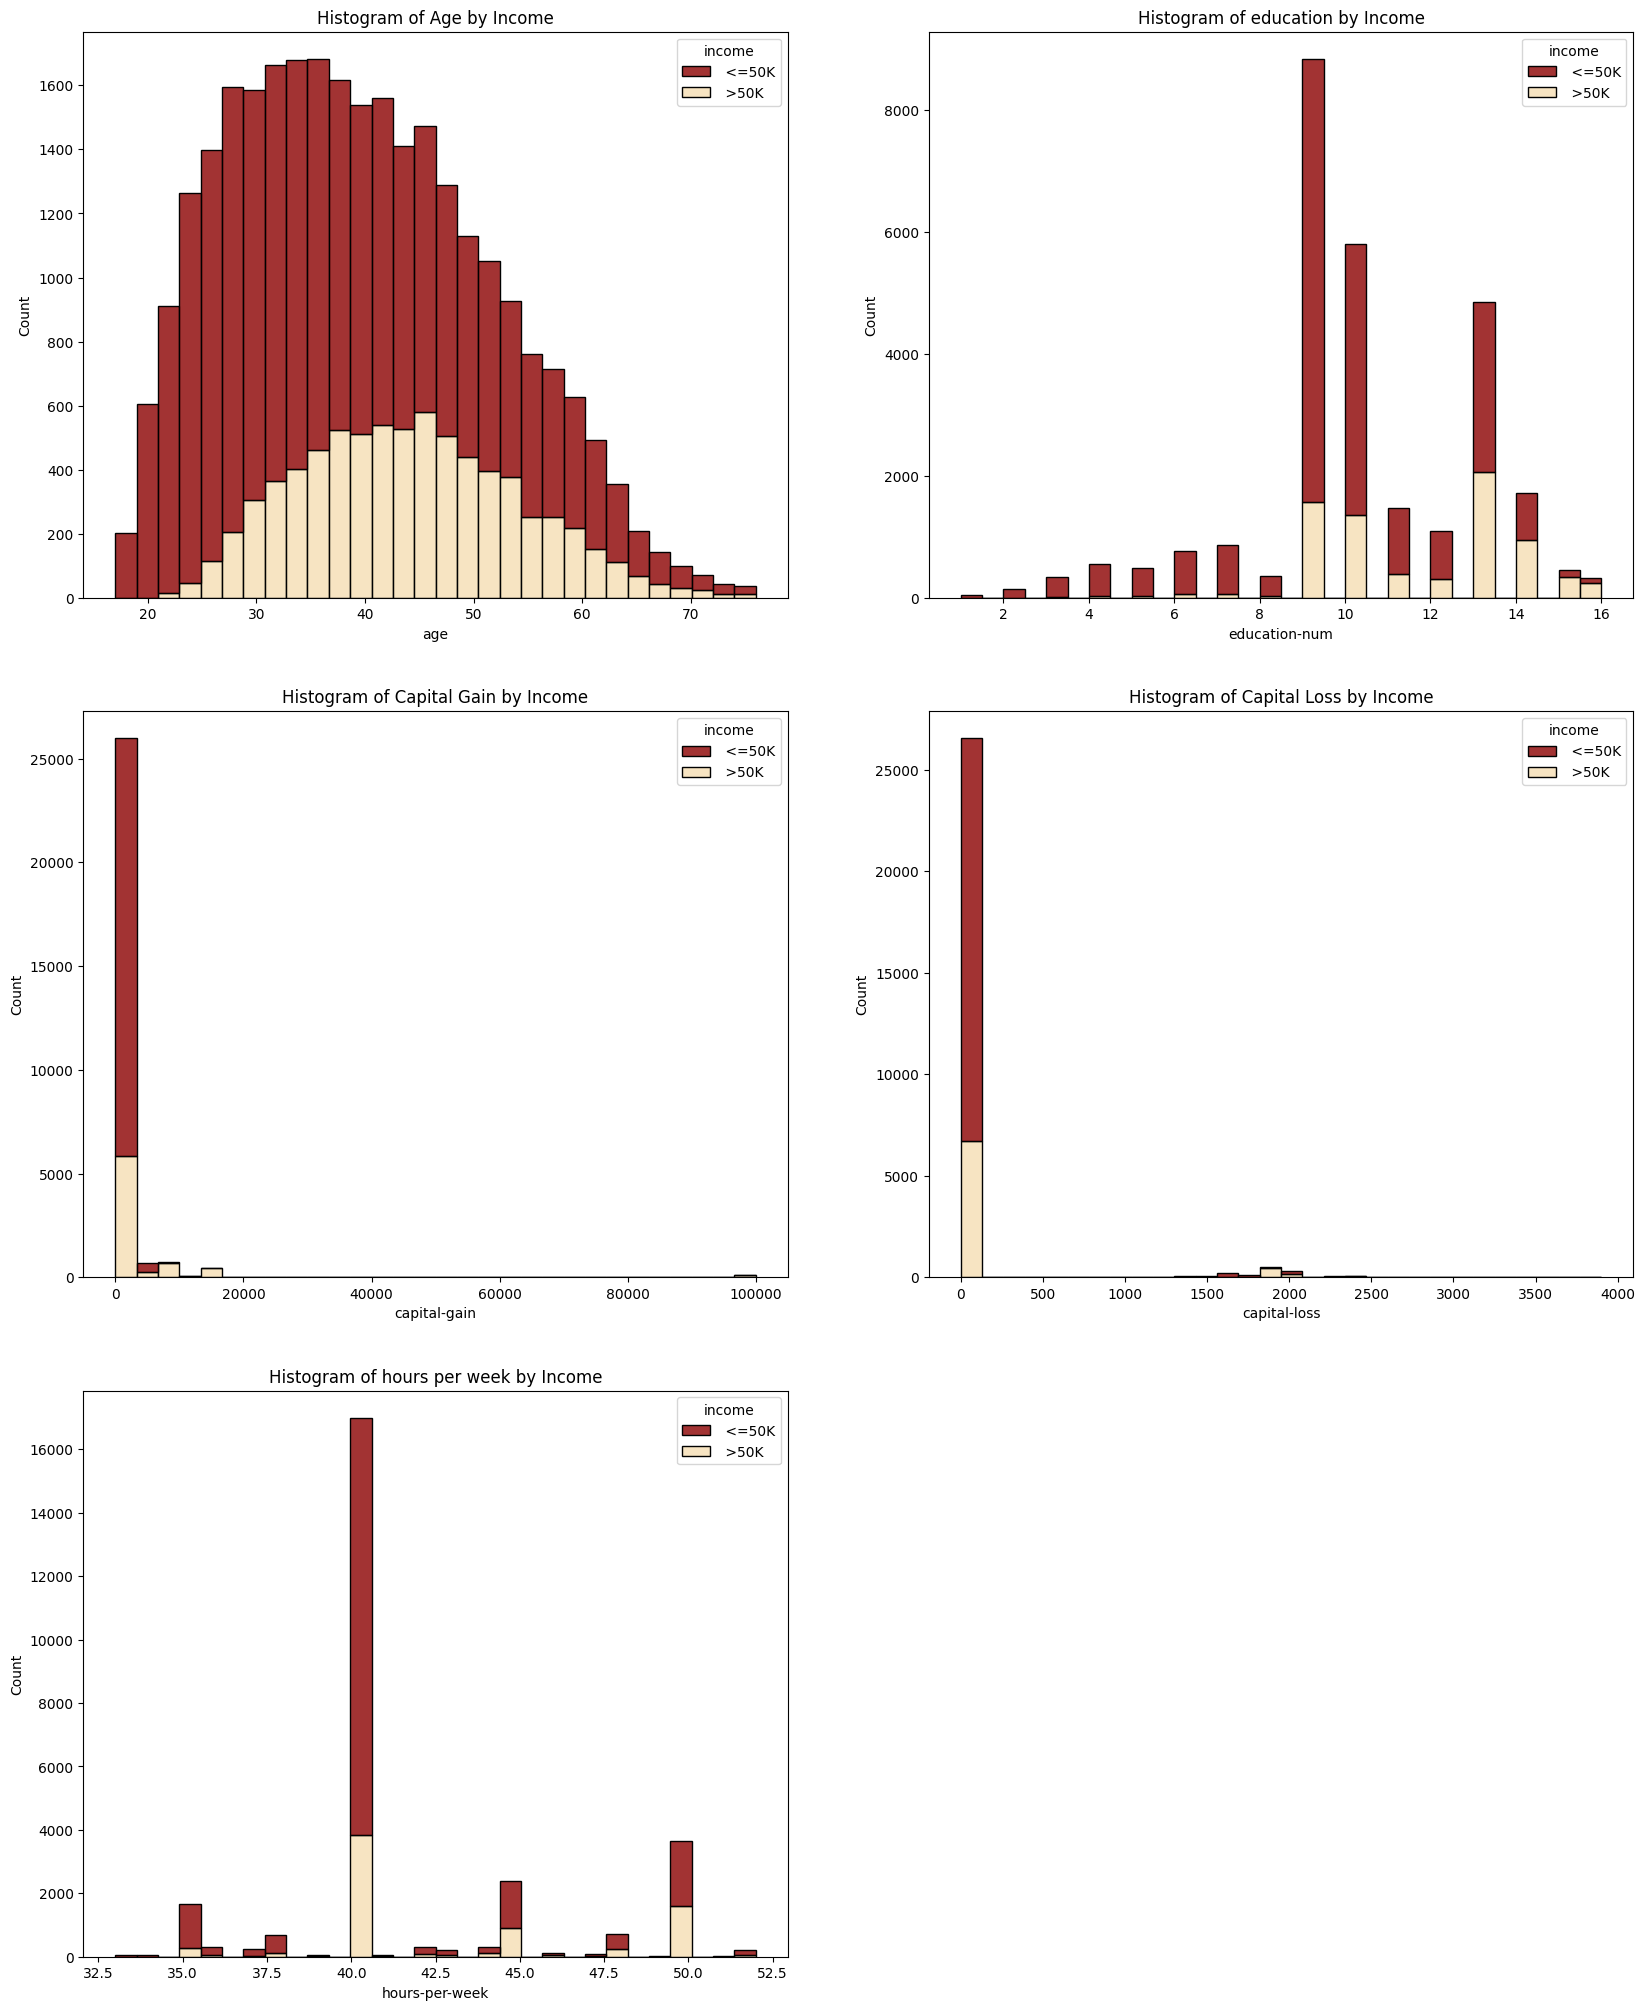

In [1494]:
#Define the colors for the two income categories
upper50='wheat'
lower50='darkred'

#Create a subplot with 3 rows and 2 columns, and set the figure size
fig,ax =plt.subplots(nrows=3,ncols=2,figsize=(20, 25))

#Create a stacked histogram of 'age' by 'income'
sns.histplot(ax=ax[0,0],data=cleaned_data, x='age', hue='income', bins=30, palette={' >50K': upper50, ' <=50K': lower50}, alpha=0.8, multiple='stack')
ax[0,0].set_title('Histogram of Age by Income')

#Create a stacked histogram of 'education-num' by 'income'
sns.histplot(ax=ax[0,1],data=cleaned_data, x='education-num', hue='income', bins=30, palette={' >50K': upper50, ' <=50K': lower50}, alpha=0.8, multiple='stack')
ax[0,1].set_title('Histogram of education by Income')

#Create a stacked histogram of 'capital-gain' by 'income'
sns.histplot(ax=ax[1,0],data=cleaned_data, x='capital-gain', hue='income', bins=30, palette={' >50K': upper50, ' <=50K': lower50}, alpha=0.8, multiple='stack')
ax[1,0].set_title('Histogram of Capital Gain by Income')

#Create a stacked histogram of 'capital-loss' by 'income'
sns.histplot(ax=ax[1,1],data=cleaned_data, x='capital-loss', hue='income', bins=30, palette={' >50K': upper50, ' <=50K': lower50}, alpha=0.8, multiple='stack')
ax[1,1].set_title('Histogram of Capital Loss by Income')

#Create a stacked histogram of 'hours-per-week' by 'income'
sns.histplot(ax=ax[2,0],data=cleaned_data, x='hours-per-week', hue='income', bins=30, palette={' >50K': upper50, ' <=50K': lower50}, alpha=0.8, multiple='stack')
ax[2,0].set_title('Histogram of hours per week by Income')

#remove the empty subplot
fig.delaxes(ax[2,1])

plt.show()


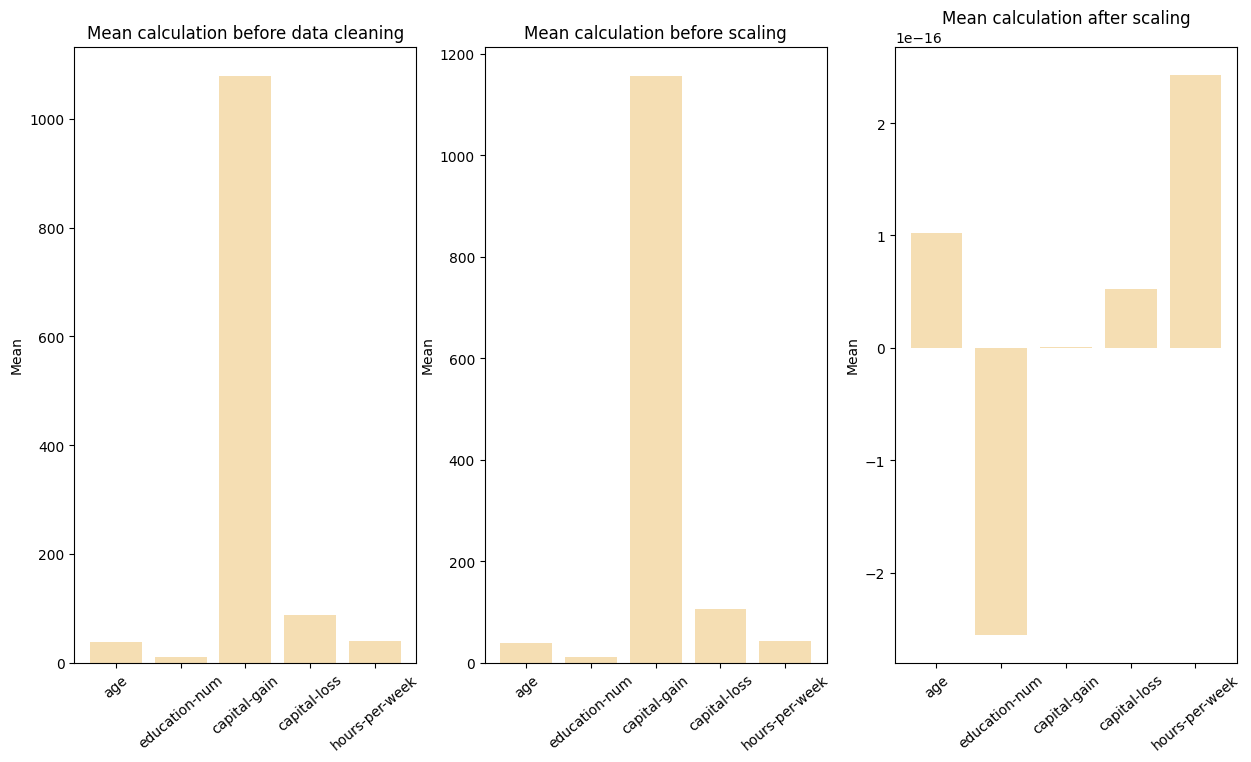

In [1495]:
#Create a subplot with 1 row and 3 columns, and set the figure size
fig, axs = plt.subplots(ncols=3, figsize=(15, 8))

#Create a bar plot of the mean values before data cleaning
axs[0].bar(range(len(mean_cdf)), mean_cdf,color='wheat')
axs[0].set_title("Mean calculation before data cleaning")
axs[0].set_ylabel("Mean")
axs[0].set_xticks(range(len(mean_cdf)))
axs[0].set_xticklabels(combined_dataframe[columns].columns, rotation=40)

#Create a bar plot of the mean values before scaling
axs[1].bar(range(len(mean_cd)), mean_cd,color='wheat')
axs[1].set_title("Mean calculation before scaling")
axs[1].set_ylabel("Mean")
axs[1].set_xticks(range(len(mean_cd)))
axs[1].set_xticklabels(combined_dataframe[columns].columns, rotation=40)

#Create a bar plot of the mean values after scaling
axs[2].bar(range(len(mean_fdf)), mean_fdf,color='wheat')
axs[2].set_title("Mean calculation after scaling")
axs[2].set_ylabel("Mean")
axs[2].set_xticks(range(len(mean_fdf)))
axs[2].set_xticklabels(combined_dataframe[columns].columns, rotation=40)

plt.show()



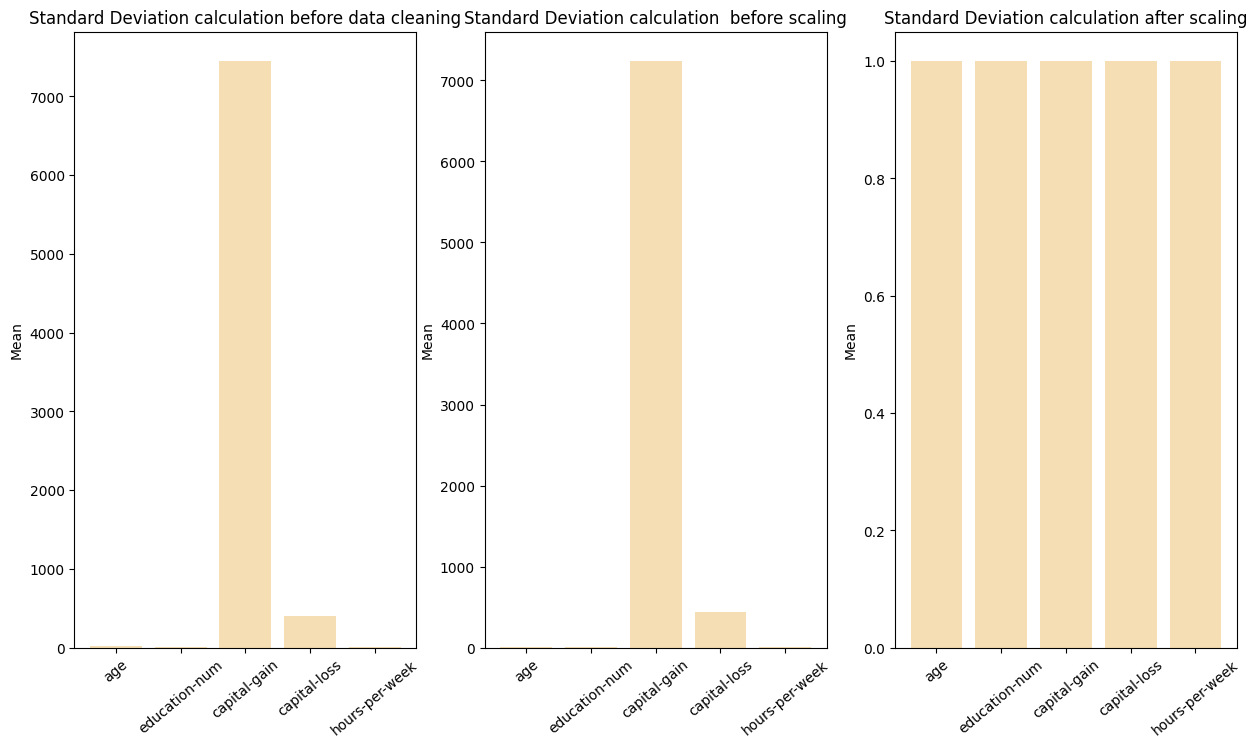

In [1496]:
#Create a subplot with 1 row and 3 columns, and set the figure size
fig, axs = plt.subplots(ncols=3, figsize=(15, 8))

#Create a bar plot of the Standard Deviation values before data cleaning
axs[0].bar(range(len(std_cdf)), std_cdf,color='wheat')
axs[0].set_title("Standard Deviation calculation before data cleaning")
axs[0].set_ylabel("Mean")
axs[0].set_xticks(range(len(std_cdf)))
axs[0].set_xticklabels(combined_dataframe[columns].columns, rotation=40)

#Create a bar plot of the Standard Deviation values before scaling
axs[1].bar(range(len(std_cd)), std_cd,color='wheat')
axs[1].set_title("Standard Deviation calculation  before scaling")
axs[1].set_ylabel("Mean")
axs[1].set_xticks(range(len(std_cd)))
axs[1].set_xticklabels(combined_dataframe[columns].columns, rotation=40)

#Create a bar plot of the Standard Deviation values after scaling
axs[2].bar(range(len(std_fdf)), std_fdf,color='wheat')
axs[2].set_title("Standard Deviation calculation after scaling")
axs[2].set_ylabel("Mean")
axs[2].set_xticks(range(len(std_fdf)))
axs[2].set_xticklabels(combined_dataframe[columns].columns, rotation=40)

plt.show()

# ***CHECK FOR CORRELATION***

In [1497]:
#Compute the correlation matrix for the final dataframe
Correlation_matrix=final_dataframe.corr()
Correlation_matrix

<ipython-input-1497-9dfc0ce96949>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Correlation_matrix=final_dataframe.corr()


,age,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.019461,0.077395,0.048289,0.033166
education-num,0.019461,1.000000,0.114385,0.078168,0.137241
capital-gain,0.077395,0.114385,1.000000,-0.038277,0.054660
capital-loss,0.048289,0.078168,-0.038277,1.000000,0.036575
hours-per-week,0.033166,0.137241,0.054660,0.036575,1.000000


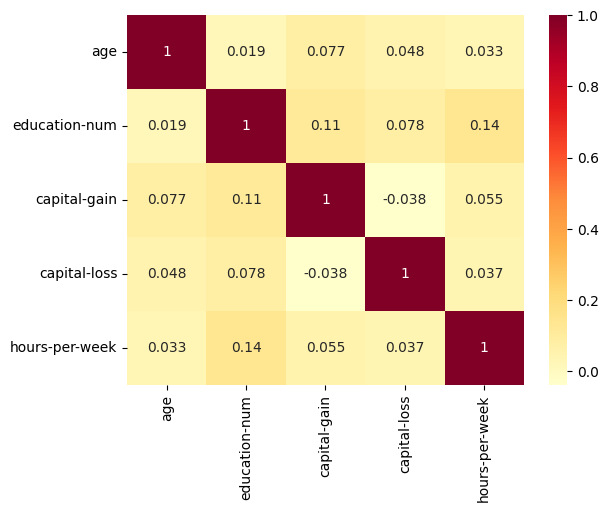

In [1498]:
#Plot the heatmap for correlation matrix
sns.heatmap(Correlation_matrix,annot=True,cmap='YlOrRd')
plt.show()

In [1499]:
# Select upper triangle of correlation matrix
upper_tri = Correlation_matrix.where(np.triu(np.ones(Correlation_matrix.shape), k=1).astype(bool))
# Find index of feature columns with correlation greater than a threshold
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

print(f'The following columns are highly correlated: {to_drop}')

#Remove highly correlated features
final_dataframe = final_dataframe.drop(to_drop, axis=1)

The following columns are highly correlated: []


# ***X y SPLITTING & ENCODING CATEGORICAL FEATURES***

    X y splitting

In [1500]:
#Drop the 'income' column from the final dataframe to create the feature set
X = final_dataframe.drop('income', axis=1)
#Use the 'income' column as the target variable
y = final_dataframe['income']

    Endcoding categorical features

In [1501]:
#Define the categorical features
label_categorical = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
#Use one-hot encoding for the categorical features
X_categorical = pd.get_dummies(X[label_categorical], drop_first=True)
#Concatenate the original dataframe (without the categorical features) with the one-hot encoded dataframe
encoded_features = pd.concat([X.drop(label_categorical, axis=1), X_categorical], axis=1)

# ***DATA BALANCING***

In [1502]:
#Count the frequency of the unique values
y.value_counts()

 <=50K    20647
 >50K      7493
Name: income, dtype: int64

<Axes: ylabel='income'>

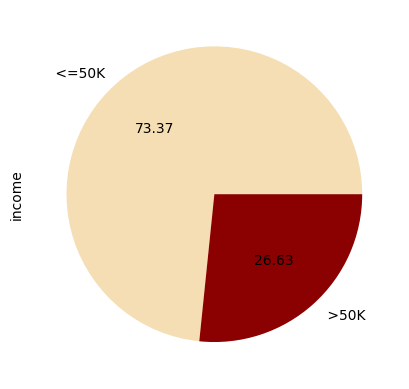

In [1503]:
#Plot the values
colors=['wheat', 'darkred']
y.value_counts().plot.pie(colors=colors,autopct='%.2f')

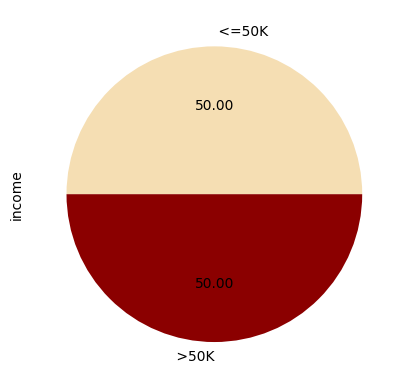

In [1504]:
#Initialize Synthetic Minority Oversampling Technique(SMOT)
smote = SMOTE()
#Fit the smot to the data
X_resampled, y_resampled = smote.fit_resample(encoded_features, y)
#Plot the values
ax = y_resampled.value_counts().plot.pie(colors=colors,autopct='%.2f')

# ***NAIVE BAYES CLASSIFICATION MODEL***

In [1505]:
#Split the resampled data into training and test sets(The test will be 20% of total data)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [1506]:
#Instantiate a Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()
#Fit the classifier to the training data
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [1507]:
#Naive Bayes classifier to predict the target variable for the test data
y_pred_tnb = naive_bayes.predict(X_test)
print(f'Classification Report for Test Data Results:\n\n{classification_report(y_test,y_pred_tnb)}')

#Naive Bayes classifier to predict the target variable for the training data
y_pred_Tnb = naive_bayes.predict(X_train)
print(f'Classification Report for Train Data Results:\n\n{classification_report(y_train,y_pred_Tnb)}')

Classification Report for Test Data Results:

              precision    recall  f1-score   support

       <=50K       0.89      0.40      0.56      4145
        >50K       0.61      0.95      0.75      4114

    accuracy                           0.68      8259
   macro avg       0.75      0.68      0.65      8259
weighted avg       0.75      0.68      0.65      8259

Classification Report for Train Data Results:

              precision    recall  f1-score   support

       <=50K       0.91      0.40      0.56     16502
        >50K       0.62      0.96      0.75     16533

    accuracy                           0.68     33035
   macro avg       0.76      0.68      0.65     33035
weighted avg       0.76      0.68      0.65     33035



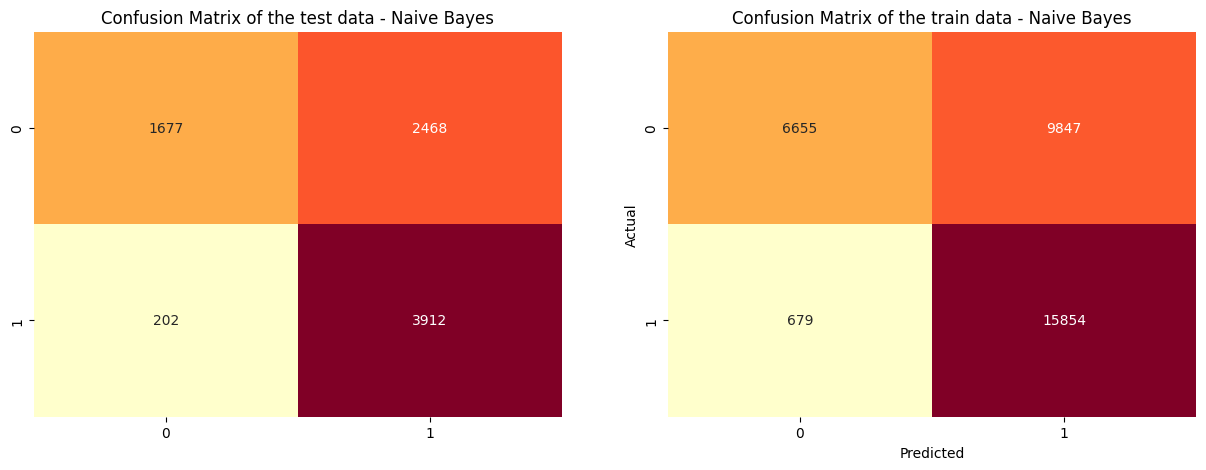

In [1508]:
#Compute the confusion matrix for the test data
conf_mat = confusion_matrix(y_test, y_pred_tnb)

#Create a subplot with 1 row and 2 columns, and set the figure size
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(15,5))

#Create a heatmap of the confusion matrix for the test data
sns.heatmap(conf_mat, annot=True, fmt="d", cbar=False,ax=ax1,cmap='YlOrRd')
ax1.set_title('Confusion Matrix of the test data - Naive Bayes')

#Compute the confusion matrix for the training data
conf_matrix = confusion_matrix(y_train, y_pred_Tnb)

#Create a heatmap of the confusion matrix for the training data
sns.heatmap(conf_matrix, annot=True, fmt="d", cbar=False,ax=ax2,cmap='YlOrRd')
ax2.set_title('Confusion Matrix of the train data - Naive Bayes')


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ***RANDOM FOREST CLASSIFICATION***

In [1509]:
#Split the encoded features and target variable into training and test sets.
#The 'random_state' parameter ensures that the splits generate are reproducible
X_train, X_test, y_train, y_test = train_test_split(encoded_features, y, test_size=0.2, random_state=42)

# Create a pipeline for handling imbalanced data and classification.
#The 'SMOTEENN' method is used for resampling the dataset
random_forest = Pipeline([
    ('sampling', SMOTEENN(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])

In [1510]:
random_forest.fit(X_train, y_train)

Pipeline(steps=[('sampling', SMOTEENN(random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [1511]:
#Random Forest classifier to predict the target variable for the test data
y_pred_trf = random_forest.predict(X_test)
print(f'Classification Report for Test Data Results:\n\n{classification_report(y_test,y_pred_trf)}')

#Random Forest classifier to predict the target variable for the training data
y_pred_Trf = random_forest.predict(X_train)
print(f'Classification Report for Train Data Results:\n\n{classification_report(y_train,y_pred_Trf)}')

Classification Report for Test Data Results:

              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      4116
        >50K       0.61      0.85      0.71      1512

    accuracy                           0.81      5628
   macro avg       0.77      0.82      0.79      5628
weighted avg       0.85      0.81      0.82      5628

Classification Report for Train Data Results:

              precision    recall  f1-score   support

       <=50K       0.95      0.82      0.88     16531
        >50K       0.64      0.89      0.74      5981

    accuracy                           0.84     22512
   macro avg       0.80      0.85      0.81     22512
weighted avg       0.87      0.84      0.84     22512



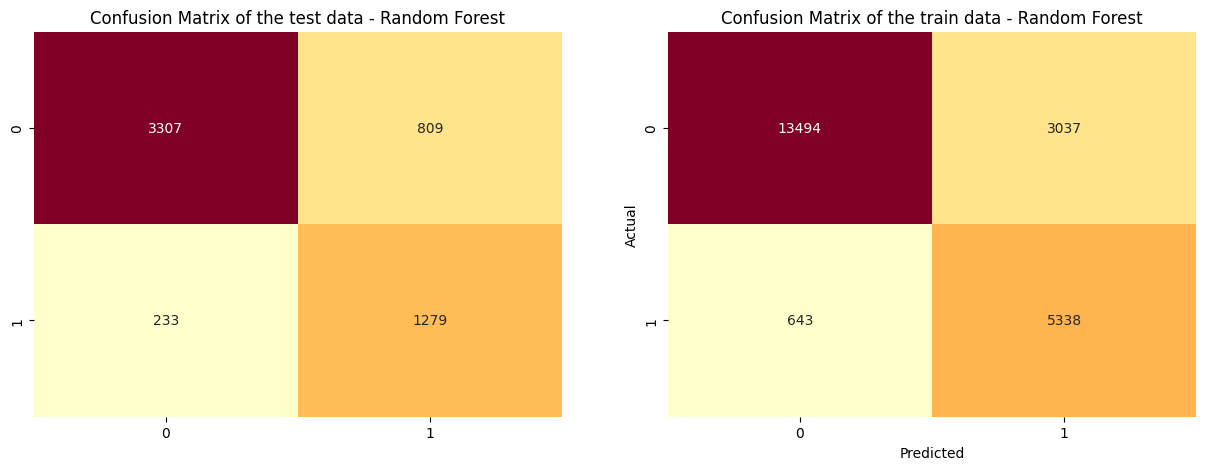

In [1512]:
#Compute the confusion matrix for the test dat
con_matr = confusion_matrix(y_test, y_pred_trf)

#Create a subplot with 1 row and 2 columns, and set the figure size
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(15,5))

#Create a heatmap of the confusion matrix for the test data
sns.heatmap(con_matr, annot=True, fmt="d", cbar=False,ax=ax1,cmap='YlOrRd')
ax1.set_title('Confusion Matrix of the test data - Random Forest')

#Compute the confusion matrix for the training data
con_matri = confusion_matrix(y_train, y_pred_Trf)

#Create a heatmap of the confusion matrix for the training data
sns.heatmap(con_matri, annot=True, fmt="d", cbar=False,ax=ax2,cmap='YlOrRd')
ax2.set_title('Confusion Matrix of the train data - Random Forest')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()